# Portfolio Examination - Machine Learning  -Tom Ruge
## Story - Task 1
The dataset contains information about a number of measured attributes from 4 different types of beans. In the factory I'm working, dried beans are being processed in order to make healthy smoothies. The dried beans are processed to powder and then mixed with other contents to produce smoothies. It is important to use the correct beans in order to fullfill the specifications. Since the delivered beans do not only contain one kind the species but four different species they need to be filtered beforehand. All used beans are being monitored by cameras in the selection process in the beginning. Those cameras film the beans and our software derives attributes like length, width and mamy more. The selection decision is done by the classification algorithm with the accommodated information. This classification algorithm will be developed in this jupyter notebook. The resulting classification will enable the company to sort the beans to fullfill the required standarts.
## The Data - Task 2
### Side Information
The data and its related information is taken from the [UCI Machine Learning Repo](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset). More information can be found in the original [paper](https://doi.org/10.1016/j.compag.2020.105507). In the research of the dataset, seven distinct types of dry beans were analyzed based on characteristics such as form, shape, type, and market-related structure. A computer vision system was created to differentiate these seven registered varieties, which share similar features, ensuring consistent seed classification. To develop the classification model, high-resolution images of 13,611 grains from the seven dry bean varieties were captured. These images underwent segmentation and feature extraction processes, resulting in the identification of 16 features—12 related to dimensions and 4 pertaining to shape forms. The data consists of 16 features and 1 target column to predict. The 16 features and their meaning will be enumerated in the following.

### Detailed Description
| Feature             | Meaning                                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------------------|
| Area (A)            | The area of a bean zone and the number of pixels within its boundaries.                                     |
| Perimeter (P)       | Bean circumference defined as the length of its border.                                                     |
| Major axis length (L) | The distance between the ends of the longest line that can be drawn from a bean.                          |
| Minor axis length (l) | The longest line that can be drawn from the bean while standing perpendicular to the main axis.           |
| Aspect ratio (K)    | Defines the relationship between the major axis length (L) and minor axis length (l).                      |
| Eccentricity (Ec)   | Eccentricity of the ellipse having the same moments as the region.                                          |
| Convex area (C)     | Number of pixels in the smallest convex polygon that can contain the area of a bean seed.                   |
| Equivalent diameter (Ed) | The diameter of a circle having the same area as a bean seed area.                                     |
| Extent (Ex)         | The ratio of the pixels in the bounding box to the bean area.                                               |
| Solidity (S)        | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.               |
| Roundness (R)       | Calculated with the following formula: (4πA)/(P^2)                                                          |
| Compactness (CO)    | Measures the roundness of an object: Equivalent diameter (Ed) divided by major axis length (L).             |
| ShapeFactor1 (SF1)  | Defined as the ratio of the major axis length (L) to the area (A): $$\frac{L}{A}$$                          |
| ShapeFactor2 (SF2)  | Defined as the ratio of the minor axis length (l) to the area (A): $$\frac{l}{A}$$                          |
| ShapeFactor3 (SF3)  | Defined as the ratio of the area (A) to the product of half the major axis length (L/2) and half the minor axis length (l/2) times π: $$\frac{A}{\left(\frac{L}{2} \cdot \frac{l}{2} \cdot \pi\right)}$$ |
| ShapeFactor4 (SF4)  | Defined as the ratio of the area (A) to the product of half the minor axis length (l/2) and half the major axis length (L/2) times π: $$\frac{A}{\left(\frac{l}{2} \cdot \frac{L}{2} \cdot \pi\right)}$$ |
| Class               | The type of dry bean: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira.                             |



### Physical Implementation
The high definition-speed camera combined with a depth sensor will be able to carry out these measurements.

## Initial Data Analysis (IDA) - Task 3
In the following part I will investigate basic properties like size, number of missing values, are there outliers and more. 

But at first we will import the necessary Python librarys:


In [88]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import make_scorer
import joblib
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from time import time
import plotly.io as pio
pio.renderers.default = "notebook"

# Getting warnings from seaborn, which are excluded here
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Import the data using pandas:

In [89]:
def read_beans():  
    # Read the data, i should change the name of the columns, so units are contained  
    df = pd.read_excel('data/Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
    return df

df = read_beans()
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

We succesfully imported the dataset using pandas. How big is the dataset:


In [90]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 13611 rows and 17 columns


The dataset is more then big enough for training a classifier. But does the dataset has missing values?

In [91]:
print(f'The dataset has {df.isnull().sum().sum()} missing values.')

The dataset has 0 missing values.


The dataset has no missing values. Our data gathering team did a good job! Now we will investigate 

In [92]:
class_distribution = df.groupby('Class').count()
fig = px.bar(class_distribution, x=class_distribution.index, y='Area', title='Class distribution')
fig.update_xaxes(categoryorder='total descending')
fig.show()  

The dataset contains measurements for 7 different types of beans. Mostly of type 'DERMASON' with around 3500 measurements then with every other type decreasing to 'BOMBAY' with 500 measurements. It is expected that the actual distribution in the application will be approxiametely the same. In the next script we will aggregate some statictical properties in order to get more information about the scale:

In [93]:
display(df.drop(columns='Class').aggregate(['min', 'max', 'mean', 'std']))

Area    Perimeter  MajorAxisLength  MinorAxisLength  \
min    20420.000000   524.736000       183.601165       122.512653   
max   254616.000000  1985.370000       738.860153       460.198497   
mean   53048.284549   855.283459       320.141867       202.270714   
std    29324.095717   214.289696        85.694186        44.970091   

      AspectRation  Eccentricity     ConvexArea  EquivDiameter    Extent  \
min       1.024868      0.218951   20684.000000     161.243764  0.555315   
max       2.430306      0.911423  263261.000000     569.374358  0.866195   
mean      1.583242      0.750895   53768.200206     253.064220  0.749733   
std       0.246678      0.092002   29774.915817      59.177120  0.049086   

      Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
min   0.919246   0.489618     0.640577      0.002778      0.000564   
max   0.994677   0.990685     0.987303      0.010451      0.003665   
mean  0.987143   0.873282     0.799864      0.006564      0.001716   
std   0.004660   0.059520     0.061713      0.001128      0.000596   

      ShapeFactor3  ShapeFactor4  
min       0.410339      0.947687  
max       0.974767      0.999733  
mean      0.643590      0.995063  
std       0.098996      0.004366

It can be seen that the features have big differences in the their scales. To not have a biased distance based classifier it is important to normalize the data in order to weight the features comparatively. I wont go further into detail of the statictical properties. As a last step I want to check for same similiar rows to make sure that the dataset does not contain redundant rows:

In [94]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates in the dataset.')

# what is the calss distribution of the duplicates
duplicates = df[df.duplicated()]
class_distribution = duplicates.groupby('Class').count()['Area'].to_frame().rename(columns={'Area': 'Duplicate Rows'})
display(class_distribution)


There are 68 duplicates in the dataset.


Duplicate Rows
Class                
HOROZ              68

The dataset contains 68 duplicates, which makes up around 3.5% of this species and 0.5% of this hole dataset. All these duplicates are from the species 'Horoz', which seems very suspicious and indicates that maybe something went wrong in the measurement process. Why only this species and not the other ones? This is why I will remove these duplicates:

In [95]:
# drop duplicates
df = df.drop_duplicates()
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 13543 rows and 17 columns


The dataset contains now no duplicates anymore. 

## Exploratory Data Analysis (EDA) - Task 4
Now we will gain a deeper insight into the data with more compley and selected plots. At first we will create a scatter plot matrix of the not derived features.

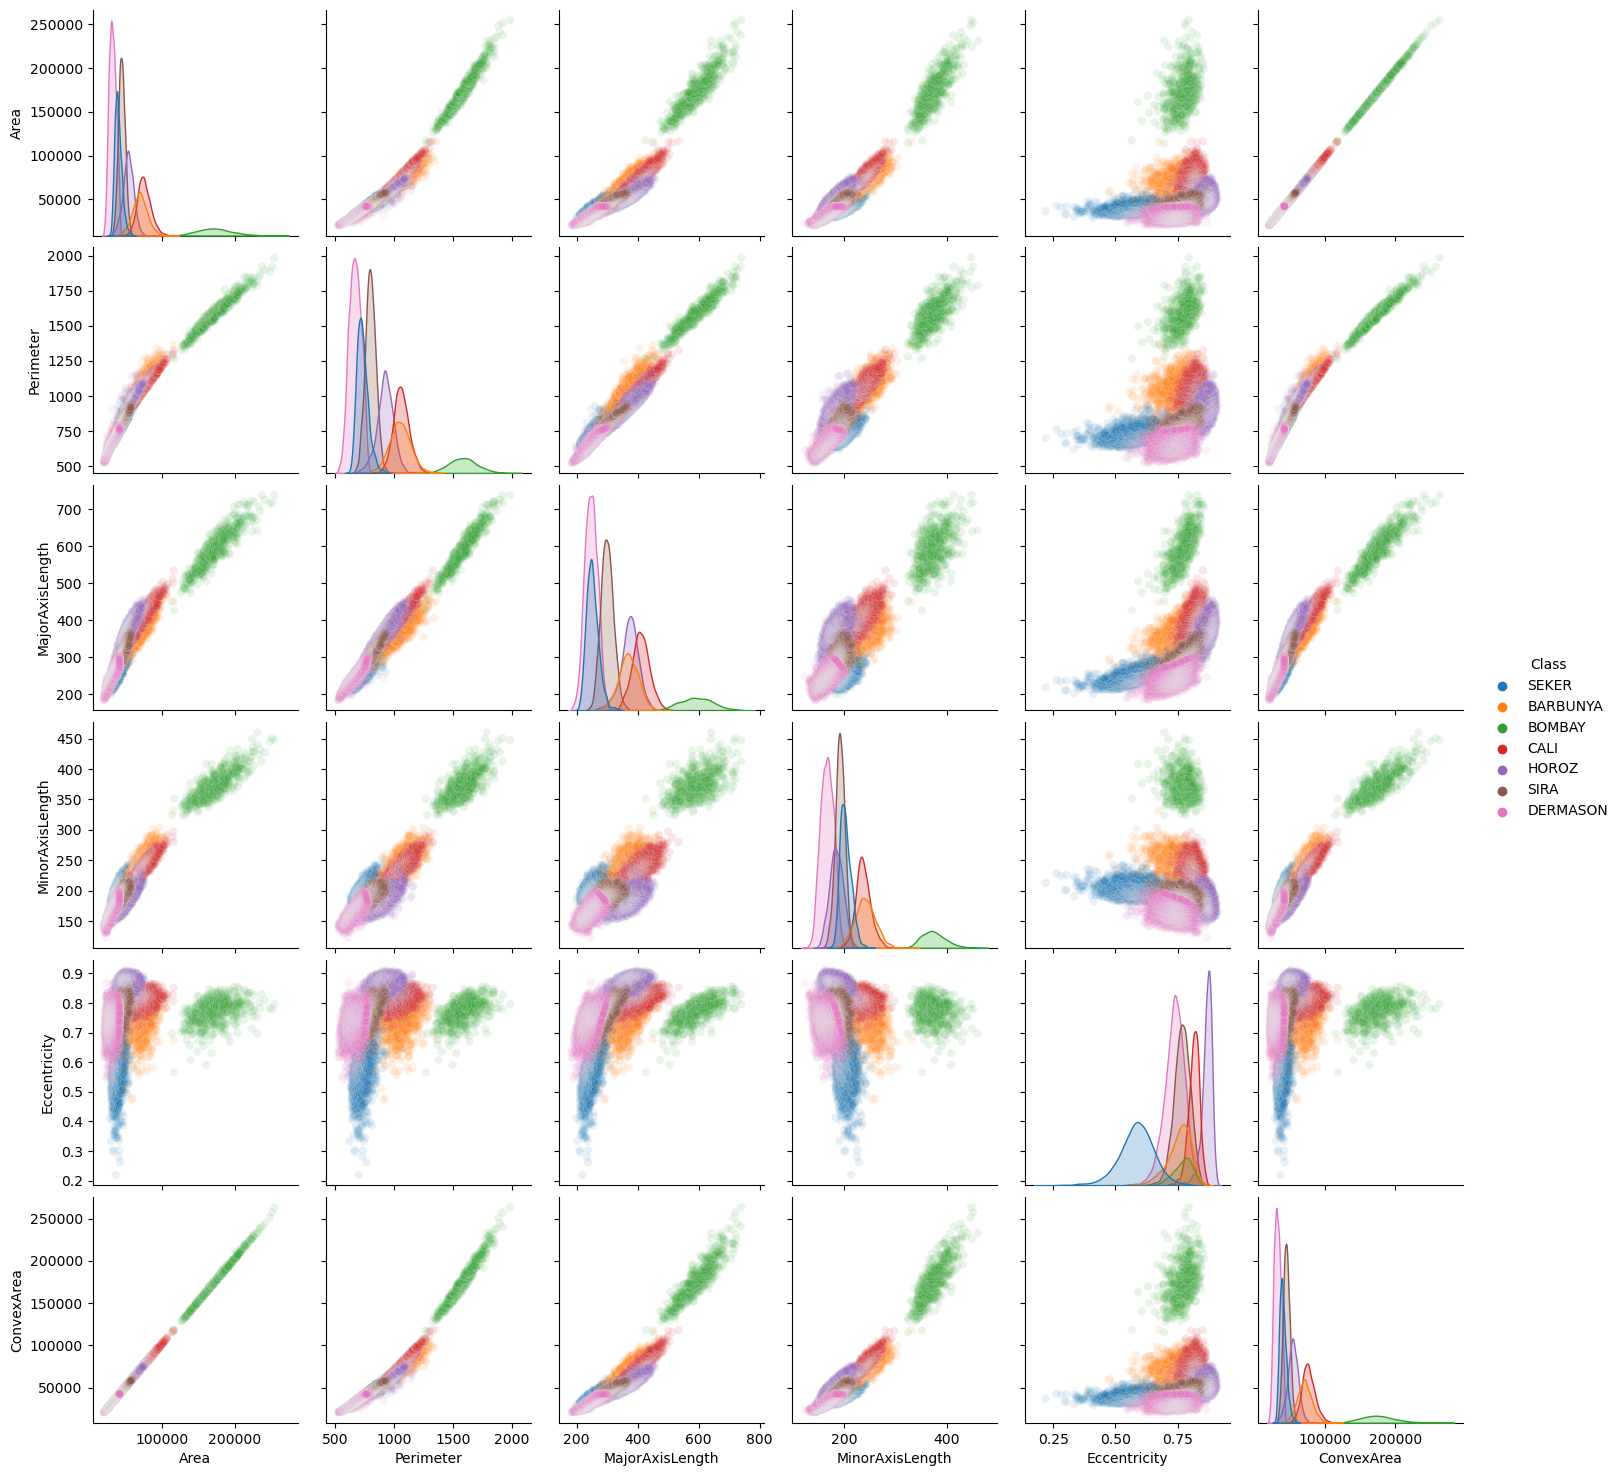

In [96]:
# pairplot with seaborn
not_derived = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Class']
sns.pairplot(df.loc[:, not_derived], hue='Class', plot_kws={'alpha':0.1})

It can be seen that the 'Bombay' beans are strongly seperated from the rest of the species. The other species are also good seperated, from which we can conclude that a classifier will probably be good in seperating different species. Also the other classes seem to be seperated quite well. We can conclude that a classifier prpbaby will lead to good results. Some features like the 'ConvexArea' and 'Area' seem to be strongly correlated. Now we will investigate how strongly the features are correlated to each other and discuss the possible problems accuring because of this:

In [97]:
# create a correlation matrix
corr = df.drop(columns='Class').corr().round(2)

# Define a custom colorscale
colorscale = [
    [0.0, "blue"],      # Blue for -1
    [0.5, "white"],     # White for 0
    [1.0, "red"]        # Red for 1
]

# Create the heatmap with the custom colorscale
fig = px.imshow(
    corr, 
    labels=dict(color='Correlation'), 
    x=corr.columns, 
    y=corr.columns, 
    text_auto=True, 
    color_continuous_scale=colorscale
)

fig.update_layout(title='Correlation Matrix', height=1000, width=1000)
fig.show()

It can be seen many features are strongly correlated with each other. This is because many features are derived form each other. But also because by the nature of beans. Bigger beans have a longer minor and major axis length compared to tiny beans. This big amount of correlation can lead to following problems:
- Features which are strongly correlated with each other can lead to overrepresentation of certain aspects. These aspects have then a higher importance then other just because there are more features essentially describing the same ascpect. This is especially with distance based algorithms a problems.

- The overrepresentation can lead to overfitting with distance based algorithms.

In this notebook we will use all features given in the dataset. In later investigation feature reduction can be tried and then compared to this approach.

-> Decision based algorithms may be the better option for this dataset. 

### Original Feautures
In the next 2 subchapters we will investigate the original and derived features seperately to keep the plots clean. We will investigate the quality of the data and investigate outliers. Now we will plot the 


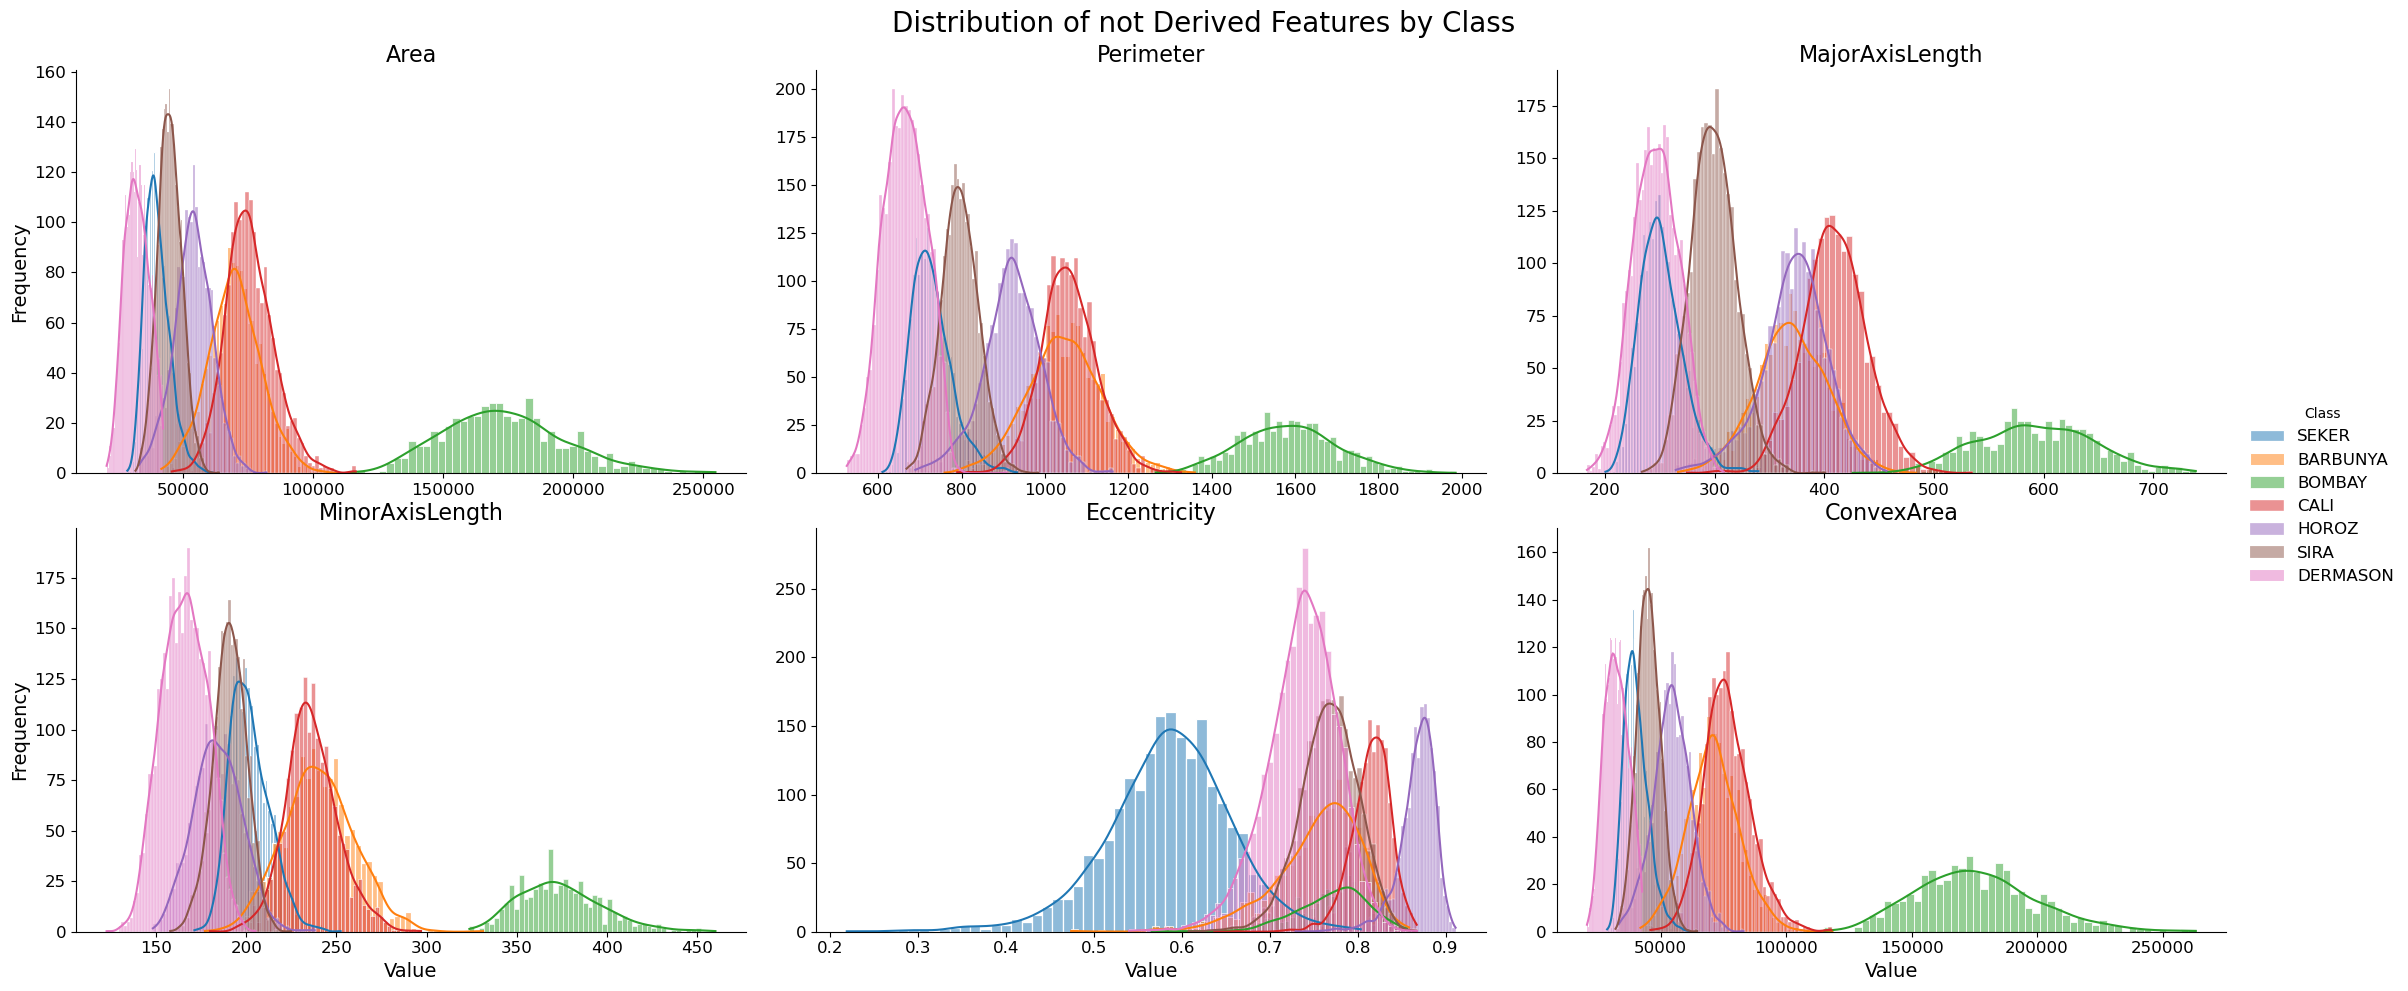

In [98]:
not_derived = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Class']
df_melted = df[not_derived].melt(id_vars='Class', var_name='Feature', value_name='Value')

# Create a FacetGrid for each feature colored by class
g = sns.FacetGrid(df_melted, col='Feature', hue='Class', col_wrap=3, sharex=False, sharey=False, aspect=1.5, height=5)

# Map the histogram to each subplot
g.map(sns.histplot, 'Value', bins=50, kde=True, alpha=0.5, edgecolor='white')

# Add legends and adjust layout
g.add_legend(title='Class', title_fontsize='15', fontsize='12')
g.set_titles('{col_name}', size=16)
g.set_axis_labels('Value', 'Frequency', fontsize=14)

# Customize tick labels
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)  # Customize tick label size

# Add a main title
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Distribution of not Derived Features by Class', fontsize=20)

# Show the plot
plt.show()

The last plot contains information about the distribution of the measured variables. No clear outliers can be seen. The other variables are derived from the just displayed attributes and therefore the other columns wont have any outliers. Now we will investigate statistical properties of the distributions using boxplots: 

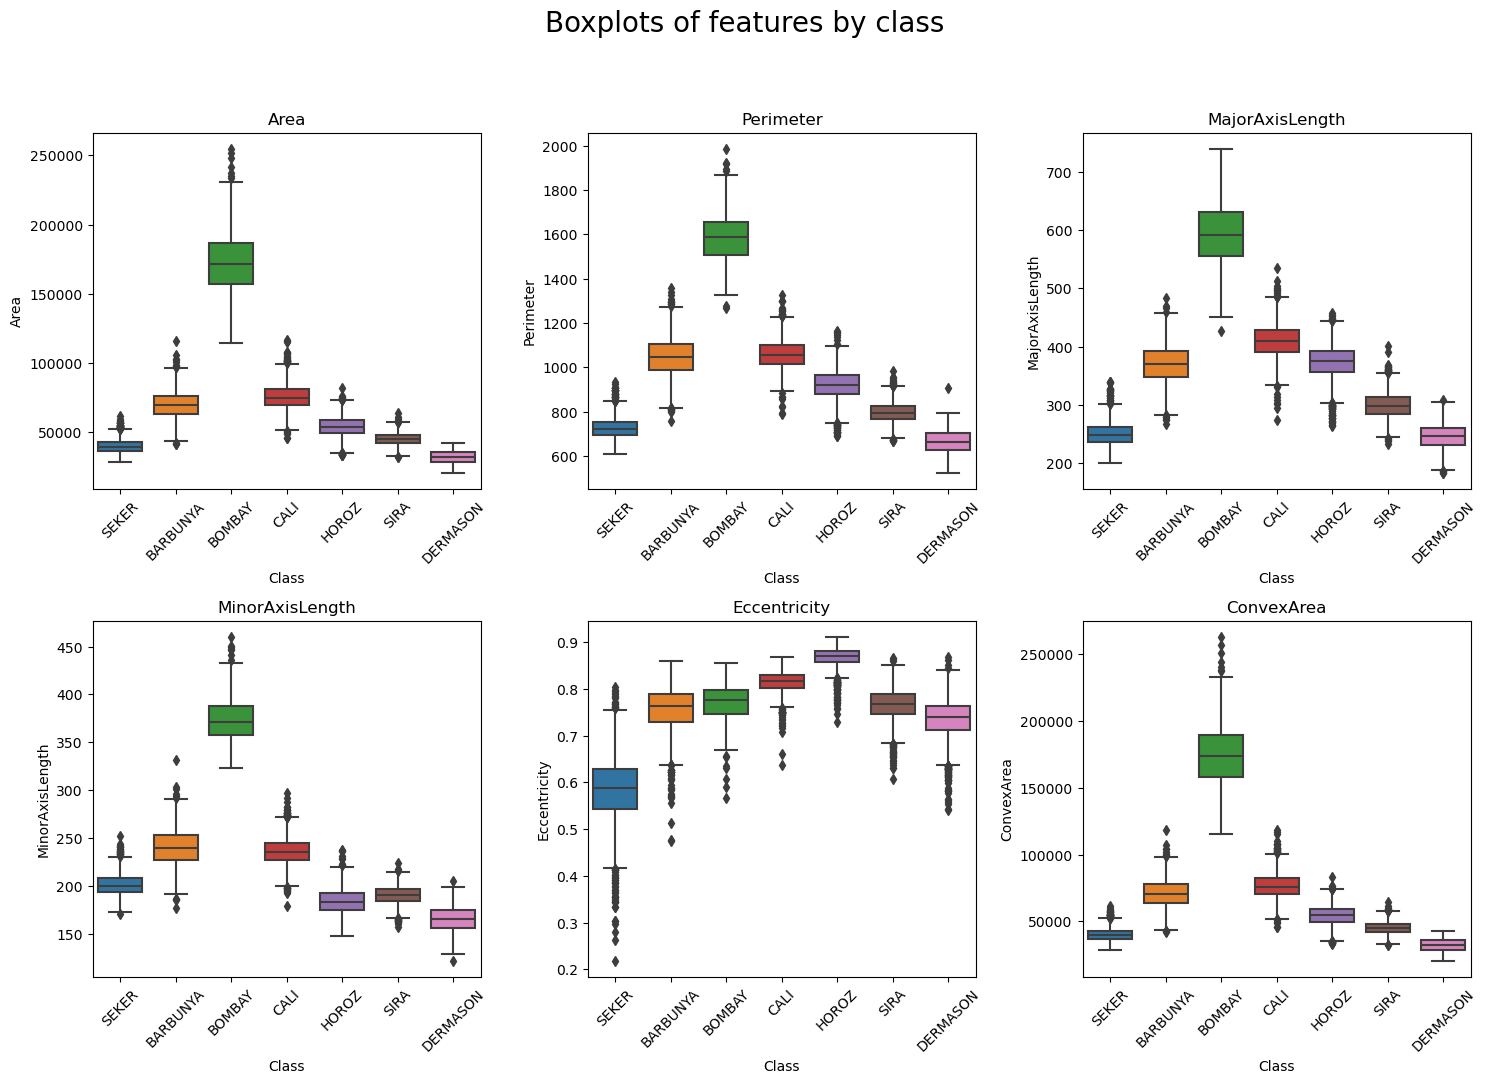

In [63]:
# Plotting boxplots for each feature grouped by class
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Boxplots of features by class', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(not_derived[:-1]):
    sns.boxplot(data=df, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
# Remove any extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


It can be seen that the different classes are seperated from each other. Especially the 'BOMBAY' species is very large, resulting in big areas, axis etc... .

### Feature engineered Features
Now we will investigate the statistical properties of the feature engineered features:

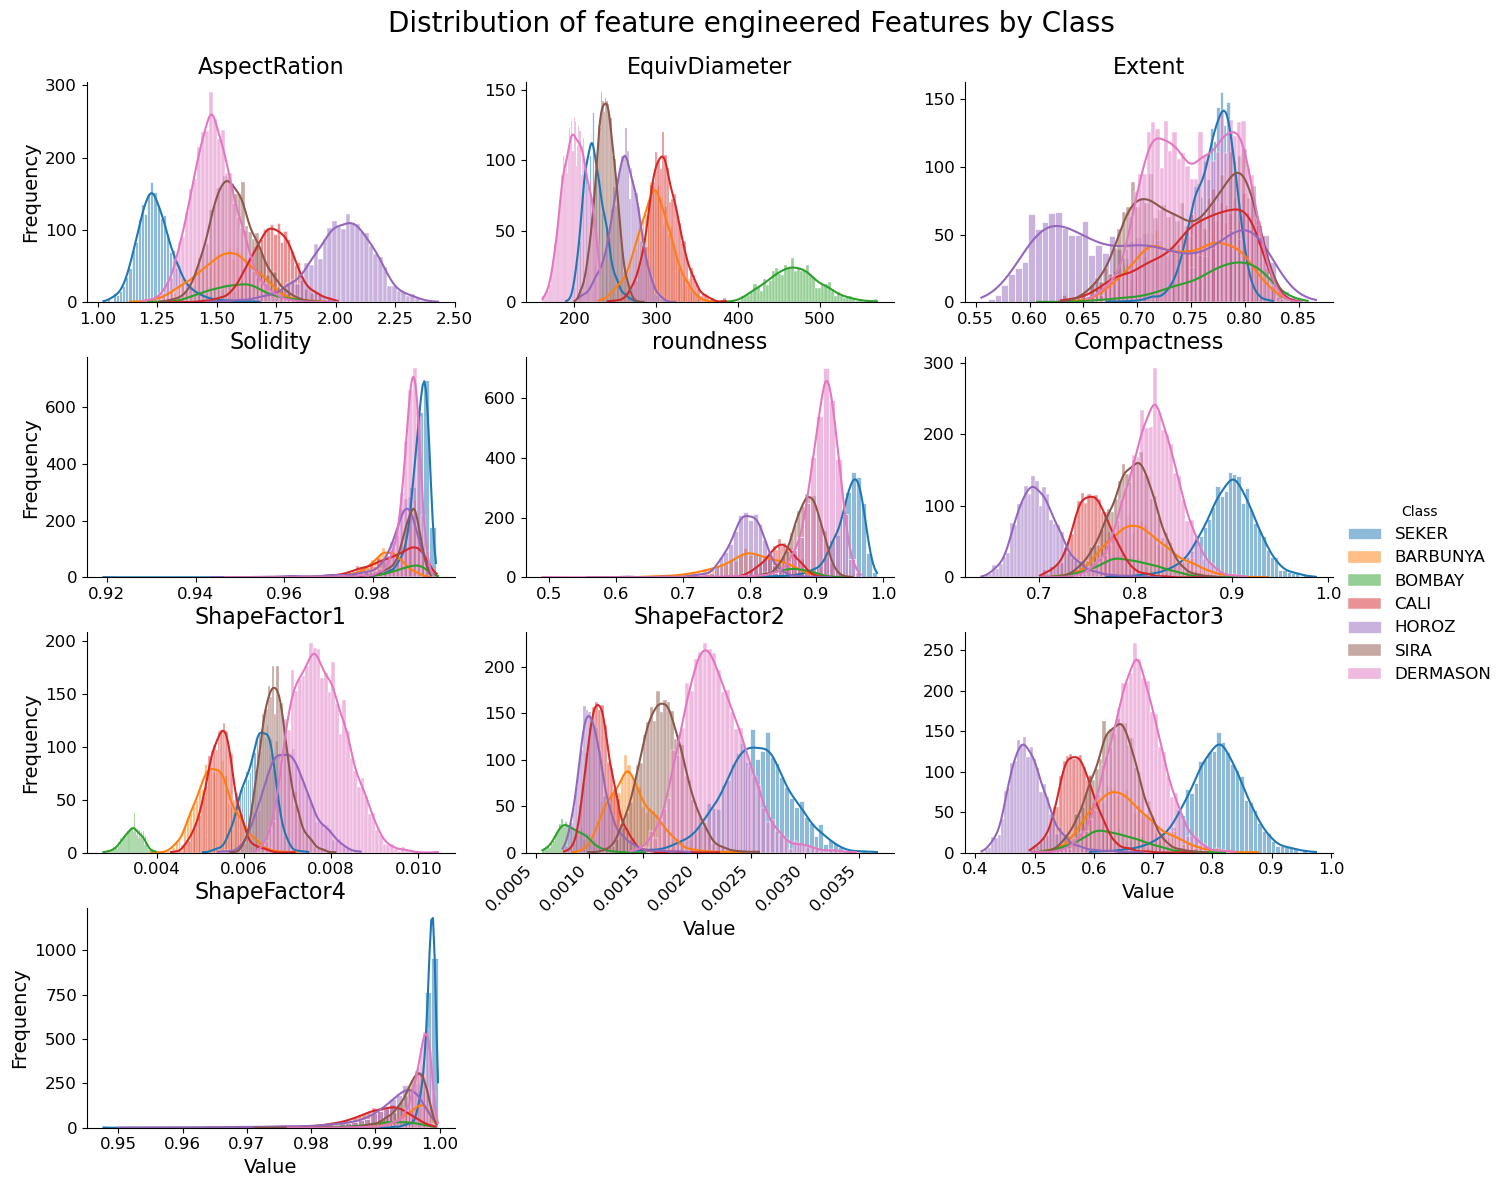

In [99]:
not_derived = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea']
df_melted = df.drop(columns=not_derived).melt(id_vars='Class', var_name='Feature', value_name='Value')

# Create a FacetGrid for each feature colored by class
g = sns.FacetGrid(df_melted, col='Feature', hue='Class', col_wrap=3, sharex=False, sharey=False, aspect=1.5, height=3)

# Map the histogram to each subplot
g.map(sns.histplot, 'Value', bins=50, kde=True, alpha=0.5, edgecolor='white')

# Add legends and adjust layout
g.add_legend(title='Class', title_fontsize='15', fontsize='12')
g.set_titles('{col_name}', size=16)
g.set_axis_labels('Value', 'Frequency', fontsize=14)

# Customize tick labels
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)  # Customize tick label size

# Rotate x-tick labels for 'ShapeFactor2' by 45 degrees
for ax, title in zip(g.axes.flatten(), g.col_names):
    if title == 'ShapeFactor2':
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')

# Add a main title
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Distribution of feature engineered Features by Class', fontsize=20)

# Show the plot
plt.show()


No clear outliers can be seen. But the attributes 'Solidity' and 'ShapeFactor4' have long tails for lower values. Many features have are not strongly overlapping, indicating that a classification will be possible. Now we will briefly investigate the statistical features with boxplots:

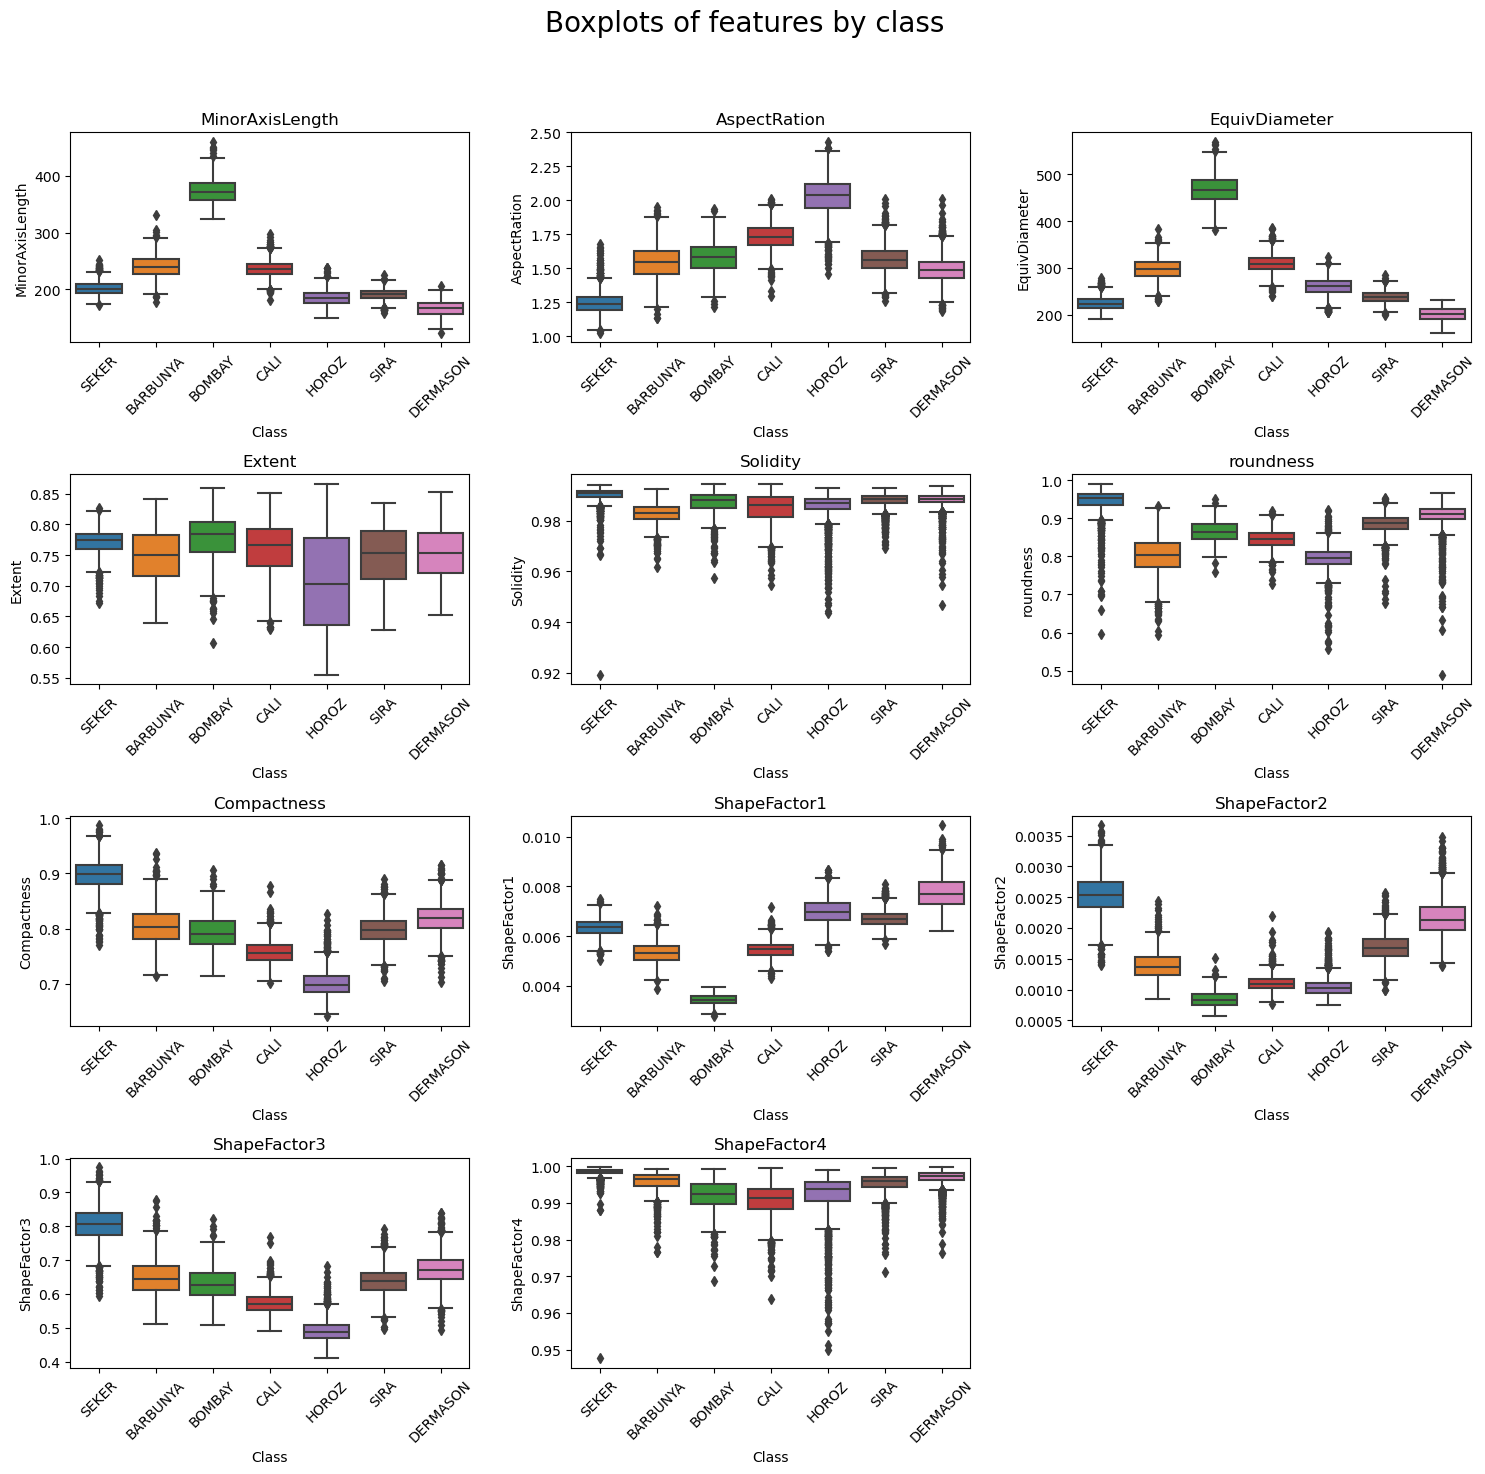

In [65]:
# Plotting boxplots for each feature grouped by class
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Boxplots of features by class', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()
derived = ['MinorAxisLength', 'AspectRation', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class']
for i, feature in enumerate(derived[:-1]):
    sns.boxplot(data=df, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
# Remove any extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


As already seen some features have a strongly skewed distribution. The important aspects have already been discussed and I will not go into further detail.

## A First Impression - Task 5

In this notebook I will create an appropriate baseline model in order to have a benchmark for the advanced classifier. We will use the [dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from sklearn. The dummy classifiers provides you with 5 different strategies. I will choose the dummy classifer which always predicts the most frequent class in the dataset. Since this dataset is strongly unbalanced, it will return a high score compared to other dummy classifiers offered by sklearn. This way we can make sure our model is better than random guessing or just voting for the most overrepresented class.

### Metrics
The goal of the classification is to classify all beans with similiar importance. Specific beans are not more imprtant than others. Since the dataset is unbalanced the typical accuray score will focus more on increasing the performance of the overpresented classes, since a better model would result in a bigger increase of the correct classified samples of the overrepresented class. This is why we will use the balanced accuracy as our metric since it makes all features equally important. Balanced accuracy is a performance metric used to evaluate the accuracy of a classification model, particularly when dealing with imbalanced datasets. It is calculated as the average of sensitivity (true positive rate) and specificity (true negative rate) of each class.

The formula for balanced accuracy is:

```
Balanced Accuracy = (Sensitivity + Specificity) / 2
```

where:

- Sensitivity = True Positive Rate = TP / (TP + FN)
- Specificity = True Negative Rate = TN / (TN + FP)

In essence, balanced accuracy provides a more accurate representation of model performance when classes are imbalanced. Also well suited for evalutaing imbalanced datasets is the F1 score which is defined as follows:

```
F1 = 2 * (Precision * Sensitivity)/(Precision + Sensitivity)
```

where:
- Precision = TP/(TP + FP)

### Baseline
Fot the baseline we will use 'most_frequent' dummy classifer, which just predicts for all samples the most frequent class in the train sample. We will iterate over 10 different train test splits to validate the balanced accuracy. But due to size of the dataset it is expected to make a big difference.

In [66]:
# At firs I want to create dataframe with the results
df_results = pd.DataFrame(columns=['Model', 'Mean Balanced Accuracy Test', 'Std Balanced Accuracy Test', 
                                   'Mean Accuracy Test', 'Std Accuracy Test', 'Mean F1 Score Test', 
                                   'Std F1 Score Test', 'Mean Balanced Accuracy Train', 'Std Balanced Accuracy Train', 
                                   'Mean Accuracy Train', 'Std Accuracy Train', 'Mean F1 Score Train', 'Std F1 Score Train', 
                                   'Fit Time','Prediction Time'])

# scorer for the used metrics, this scorer will be use through the notebook
def scorer(y_true, y_pred):
    b_acc = balanced_accuracy_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return b_acc, acc, f1

In [67]:
# Split the data into train and test
X = df.drop(columns='Class')
y = df['Class']

def inter_dummy(df, df_results=df_results):
    # Split the data into train and test
    X = df.drop(columns='Class')
    y = df['Class']
    # fot the results
    b_accs_test = []
    accs_test = []
    f1s_test = []
    b_accs_train = []
    accs_train = []
    f1s_train = []
    fitting_times = []
    prediction_times = []
    for index in range(10):
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=index)

        # Create a dummy classifier
        dummy = DummyClassifier(strategy='most_frequent')
        a = time()
        dummy.fit(X_train, y_train)
        fitting_times.append(time()-a)
        b = time()
        y_pred = dummy.predict(X_test)
        prediction_times.append(time()-b)
        # Calculate the balanced accuracy
        b_acc_test, acc_test, f1_test = scorer(y_test, y_pred)
        b_acc_train, acc_train, f1_train = scorer(y_train, dummy.predict(X_train))

        # append the results
        b_accs_test.append(b_acc_test); accs_test.append(acc_test); f1s_test.append(f1_test)
        b_accs_train.append(b_acc_train); accs_train.append(acc_train); f1s_train.append(f1_train)

    # append the results to the dataframe
    df_results.loc[len(df_results)] = ['Dummy_most_frequent', np.mean(b_accs_test), np.std(b_accs_test), np.mean(accs_test), np.std(accs_test), 
                                       np.mean(f1s_test), np.std(f1s_test), np.mean(b_accs_train), np.std(b_accs_train), 
                                       np.mean(accs_train), np.std(accs_train), np.mean(f1s_train), np.std(f1s_train), 
                                       np.mean(fitting_times), np.mean(prediction_times)]
    return df_results

df_results = inter_dummy(df, df_results)
df_results

Model  Mean Balanced Accuracy Test  \
0  Dummy_most_frequent                     0.142857   

   Std Balanced Accuracy Test  Mean Accuracy Test  Std Accuracy Test  \
0                         0.0            0.262072           0.006072   

   Mean F1 Score Test  Std F1 Score Test  Mean Balanced Accuracy Train  \
0            0.108877           0.004531                      0.142857   

   Std Balanced Accuracy Train  Mean Accuracy Train  Std Accuracy Train  \
0                          0.0              0.26173            0.002602   

   Mean F1 Score Train  Std F1 Score Train  Fit Time  Prediction Time  
0             0.108592            0.001933  0.004232         0.000095

I iterated the dummy classifier 10 times in order to get not biased accruacys, which is the less dependent on the rand train test split. We archieved a accuracy of 14% with a standart deviation of approx. 0. After dividing 100 by the number of classes we yield indeed $\frac{100}{7} \approx 14 \% $. The standart deviation is relatively small due to big size of the dataset. Iterating over multiple splits was not necessary. I will not go into further details, since this is only a baseline.

### Selection of 2 Classifiers
I will use one distance based classifying algorithm and one decision based clasifiers. It is not necessary for the task to understand why the algorithm decided the way it decided. Also no threshold for the classification accuracy is known. This is why I will find a a good classifier independent of its performance. This will be a future task to adapt this to the techniqual requirements. I will compare the Adaptive Boost (AdaBoost) model with a Support Vector Machine (SVM) model with each other. 

#### AdaBoost (Adaptive Boosting)

AdaBoost, short for Adaptive Boosting, is a machine learning ensemble method used for classification and regression. It works by combining multiple weak learners, typically decision trees with a single level of depth (stumps), to create a strong classifier.

##### How AdaBoost Works

1. **Building Weak Learners (Stumps):** 
   - Initially, each instance in the training set is given equal weight.
   - A weak learner (e.g., decision stump) is trained on the dataset.
   - It aims to classify the data slightly better than random chance.

2. **Weighted Voting:**
   - After the first weak learner is trained, the misclassified instances are given higher weight.
   - Subsequent weak learners focus more on the misclassified instances from previous iterations.
   - Each weak learner is assigned a weight based on its accuracy.

3. **Combining Weak Learners:**
   - The final model is a weighted combination of the weak learners.
   - Learners with higher accuracy are given more weight in the final decision.
   - The final model assigns higher importance to the features that contribute most to reducing classification errors.


#### Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are a powerful supervised machine learning algorithm used for classification and regression tasks. They are particularly effective in high-dimensional spaces and when the number of features exceeds the number of samples. SVMs work by finding the optimal hyperplane that best separates data points belonging to different classes.

##### How SVM Works

1. **Finding the Optimal Hyperplane:**
   - SVM aims to find the hyperplane that maximizes the margin between the classes.
   - The hyperplane is the decision boundary that separates data points of one class from those of the other class.
   - SVM considers only the data points nearest to the hyperplane, called support vectors, to define the decision boundary.

2. **Handling Non-Linearity:**
   - SVM can handle non-linear decision boundaries by using a technique called the kernel trick.
   - The kernel function maps the original input space into a higher-dimensional feature space, where data points become linearly separable.
   - Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

3. **Regularization Parameter (C):**
   - SVM introduces a regularization parameter (C) to control the trade-off between maximizing the margin and minimizing classification errors.
   - A smaller value of C allows for a wider margin but may lead to misclassification errors, while a larger value of C reduces the margin but may improve classification accuracy.

#### AdaBoost and SVM with Default Settings
In order to get an first impression of how well this machine learning algorithm works, we will run AdaBoost with decision trees as weak learners and a SVM with their default parameters:

In [68]:
def tt_split(df, random_state=42):
    X = df.drop(columns='Class')
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    # make dataframes from the arrays
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    return X_train, X_test, y_train, y_test

def impression(df):
    X_train, X_test, y_train, y_test = tt_split(df)
    # scale
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # support vector machine default
    svc = SVC()
    fitting_time = time()
    svc.fit(X_train, y_train)
    fitting_time = time() - fitting_time
    y_pred = svc.predict(X_test)
    prediction_time = time() - fitting_time
    b_acc_test, acc_test, f1_test = scorer(y_test, y_pred)
    b_acc_train, acc_train, f1_train = scorer(y_train, svc.predict(X_train))
    df_results.loc[len(df_results)] = ['SVC_default', b_acc_test, None, acc_test, None, 
                                       f1_test, None, b_acc_train, None, acc_train, 
                                       None, f1_train, None, fitting_time, prediction_time] 

    # AdaBoost with DecisionTreeClassifier
    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier())
    fitting_time = time()
    ada.fit(X_train, y_train)
    fitting_time = time() - fitting_time
    y_pred = ada.predict(X_test)
    prediction_time = time() - fitting_time
    b_acc_test, acc_test, f1_test = scorer(y_test, y_pred)
    b_acc_train, acc_train, f1_train = scorer(y_train, ada.predict(X_train))
    df_results.loc[len(df_results)] = ['AdaBoost_default', b_acc_test, None, acc_test, None, 
                                       f1_test, None, b_acc_train, None, acc_train, 
                                       None, f1_train, None, fitting_time, prediction_time]

In [69]:
display(df_results)

Model  Mean Balanced Accuracy Test  \
0  Dummy_most_frequent                     0.142857   

   Std Balanced Accuracy Test  Mean Accuracy Test  Std Accuracy Test  \
0                         0.0            0.262072           0.006072   

   Mean F1 Score Test  Std F1 Score Test  Mean Balanced Accuracy Train  \
0            0.108877           0.004531                      0.142857   

   Std Balanced Accuracy Train  Mean Accuracy Train  Std Accuracy Train  \
0                          0.0              0.26173            0.002602   

   Mean F1 Score Train  Std F1 Score Train  Fit Time  Prediction Time  
0             0.108592            0.001933  0.004232         0.000095

In the previous code we fitted AdaBoost with decision trees and a Support Vector machine and it can be seen the SVM scores significantly better then the AdaBoost model. All the 3 used scores are significantely better the AdaBoost classifier. This maybe implies that support vector machines do work better in this case. The prediction time of both learners are the same, but the fitting time of the AdaBoost model is almolst 50% less than with the SVM. 

## Nested Cross Validation - Task 6
In this chapter we will find out whether Adaboost or SVM perform better with optimized hyperparameters on the dataset. To do this we will use a nested cross validation in order to get a split unbiased score. A model selection without a nested cross validation uses the same data to tune the hyperparameters and evaluate its performance. Information might leek into the prediction. Here an esample from scikit learn where a classifer was trained on the Iris dataset:


![](https://scikit-learn.org/stable/_images/sphx_glr_plot_nested_cross_validation_iris_001.png)
### How Nested Cross-Validation Works

1. **Outer Loop (Model Evaluation):**
   - The dataset is split into multiple folds, typically using k-fold stratified cross-validation.
   - In each iteration of the outer loop, one fold is used as the test set, and the remaining folds are used for training.

2. **Inner Loop (Hyperparameter Tuning):**
   - Within each iteration of the outer loop, an inner loop is employed for hyperparameter tuning.
   - The training set from the outer loop is further split into multiple folds, typically using another round of k-fold cross-validation.
   - Various combinations of hyperparameters are evaluated using the training folds, and the optimal hyperparameters are selected based on performance metrics.

3. **Model Evaluation:**
   - After hyperparameter tuning in the inner loop, the selected model with its optimal hyperparameters is trained on the entire training set from the outer loop.
   - The performance of this model is then evaluated on the test fold from the outer loop, yielding an unbiased estimate of the model's generalization performance.
   - This is done for all outer loops and the scores are averaged. This is the final score of the model.

More information can be found on the official [scikit learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

### Support Vector Machine
Now we will investigate how well the support vector machines work on the dataset. Since we will use a gridsearch we need to first find an appropriate grid. Following hyperparameters will be optimized:

- **C:** This parameter punishes th digression. A high C results in high punishment for digression.

- **kernel:** The kernel trick maps the data to more dimensions and seperates the data according to the symmetry of the kernel functions. 5 kernel implementations are defined in sklearn. Due to computational effiency only polynomial functions and radial basis functions are used.

- **degree:** Degree of the polynomial kernel.

- **gamma:** Gamma parameter determines the influence of a single training example. Specifically, it defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.

- **decision_function_shape:** Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision.

- **coef0:** This parameter adds this coef0 to the polynomial or sigmoid kernel function. This parameters scales the influence of higher order terms in polynomial 

In the next step we need to define an appropriate grid in order to yield meaningfull results.
#### Choosing a Reasonable Hyperparameter Grid

We will only investigate the continous parameters since the non continous ones are limited to few options. But they will still make the computation factors longer. We will take the following approach for finding a good grid. 

1. We will calculate a grid for the hyperparameters C and gamma and we will display the balanced accuracies with a heatmap. 
...

In [70]:
def opt_2d(df, param_grid, model):
    X_train, X_test, y_train, y_test = tt_split(df)

    # standart scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create a dictionary with the hyperparameters
    scores_test = np.zeros((len(list(param_grid.values())[0]), len(list(param_grid.values())[1])))
    scores_train = np.zeros((len(list(param_grid.values())[0]), len(list(param_grid.values())[1])))
    for i_C,C in enumerate(list(param_grid.values())[0]):
        for i_gamma, gamma in enumerate(list(param_grid.values())[1]): 
            params = {list(param_grid.keys())[0]: C, list(param_grid.keys())[1]: gamma} 
            model.set_params(**params)  
            # Create a SVC model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # test score
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            # i_C is the row -> y-axis, i_gamma is the column -> x-axis
            scores_test[i_C, i_gamma] = balanced_accuracy
            # train score
            y_pred = model.predict(X_train)
            balanced_accuracy = balanced_accuracy_score(y_train, y_pred)
            scores_train[i_C, i_gamma] = balanced_accuracy
    return scores_test, scores_train


def two_d_hist(param_grid, scores_train, scores_test, type_scale = 'log'):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Test', 'Train'))

    x_res = list(param_grid.values())[1]
    y_res = list(param_grid.values())[0]

    x_name = list(param_grid.keys())[1]
    y_name = list(param_grid.keys())[0]
    custom_colorscale = [
        [0, 'yellow'],
        [0.9, 'green'],
        [1, 'red']
    ]
    heatmap_train = go.Heatmap(
        z=scores_train,
        x=x_res,
        y=y_res,
        colorscale=custom_colorscale,
        showscale=True,
        text=[[f'{val:.4f}' for val in row] for row in scores_train],
        texttemplate="%{text}",
        textfont={"size":10}
    )
    fig.add_trace(heatmap_train, row=1, col=2)

    heatmap_test = go.Heatmap(
        z=scores_test,
        x=x_res,
        y=y_res,
        colorscale=custom_colorscale,
        showscale=False,
        text=[[f'{val:.4f}' for val in row] for row in scores_test],
        texttemplate="%{text}",
        textfont={"size":10}
    )
    fig.add_trace(heatmap_test, row=1, col=1)

    fig.update_layout(
        height=600,
        width=1000,
        title_text='Train and Test Heatmaps'
    )

    fig.update_xaxes(title_text=x_name, row=1, col=1, type=type_scale)
    fig.update_yaxes(title_text=y_name, row=1, col=1, type=type_scale)
    fig.update_xaxes(title_text=x_name, row=1, col=2, type=type_scale)
    fig.update_yaxes(title_text=y_name, row=1, col=2, type=type_scale)

    fig.show()

In [71]:
param_grid = {
        'C': [10e-3, 10e-2, 10e-1, 1, 10, 100, 1000, 10000, 100000] ,
        'gamma': [10e-6,10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1, 10, 100]
    }

model = SVC()

scores_test, scores_train = opt_2d(df,param_grid, model)
two_d_hist(param_grid, scores_train, scores_test)

**Grid for 'C' and 'gamma':**

- It can be seen that the test accuracy is high high C values and gamma values around 0.01, reaching a balanced aacuracy of around 94.3%. The train accuracy is very high for high gamma and C values. Too avoid overfitting smaller moderate gammas should be used, where the train balanced accuracy is approx the test balanced accuracy. Due to the size of the dataset I will only choose 3 C and gamma values each in order to keep the computation time low:

    - 'C': [1, 10, 100]
    
    - 'gamma': [0.001, 0.01, 0.1]
- In the next investigations I will use a C=100 and a gamma=0.01.

Since the classes are unbalanced and since it is the goal to maximize the balanced accuracy, I will investigate whether the class weighting improves the accuracy:

In [72]:
def bal_accuracy(df, params):
    for i in range(20):
        # train test split
        X_train, X_test, y_train, y_test = tt_split(df, random_state=i)

        # standart scaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        weights = [None,'balanced']
        bal_acc = [[],[]]
        for i_weights, weight in enumerate(weights):
            svc = SVC(**params, class_weight=weight)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            b_acc = balanced_accuracy_score(y_test, y_pred)
            bal_acc[i_weights].append(b_acc)
    print(f'The balanced accuracy of the SVC model with class weight None is {np.mean(bal_acc[0]):.4f} and with class weight balanced is {np.mean(bal_acc[1]):.4f}')

params = {'C': 100, 'gamma': 0.01}
bal_accuracy(df, params)

The balanced accuracy of the SVC model with class weight None is 0.9394 and with class weight balanced is 0.9403


**Grid for class_weight:**
- The balanced accuracy is significantely better with a balanced class weighting. I will use the balanced class weight:
    - 'class_weight': ['balanced']
    

Now we will investigate wether the accuracy changes whether we use 'one vs. one' or 'one vs. rest' as the decision function shape. But what does this mean? A support vector machine by its default is a binary classifier. It seperates 2 classes by using a hyperplane. When expanding this binary problem to a multi class problem, two aproaches can be taken:

**One-vs-One (OvO):**
- In the OvO strategy, a separate classifier is trained for every pair of classes. For a problem with \(k\) classes, this results in $\frac{k(k-1)}{2}$ classifiers. During prediction, each classifier votes for a class, and the class with the most votes is chosen. $k$ is the number of classes.

**One-vs-Rest (OvR):**
- In the OvR strategy, a single classifier is trained for each class, where the class is pitted against all other classes. For \(k\) classes, \(k\) classifiers are trained. Each classifier outputs a score, and the class with the highest score is chosen.

In our case we have 7 classes. This means the 'OvO' strategie needs to train 21 classifiers and the one vs. rest classifier only 6. But also the amount of data for each 'OvO' classification is less. We will also investigate the runtime for each strategie. We will use for the C and gamma parameter an appropriate parameter we just investigated now.


The balanced accuracy of the SVC model with decision function shape ovo is 0.9379958189788775
The balanced accuracy of the SVC model with decision function shape ovr is 0.9379958189788775


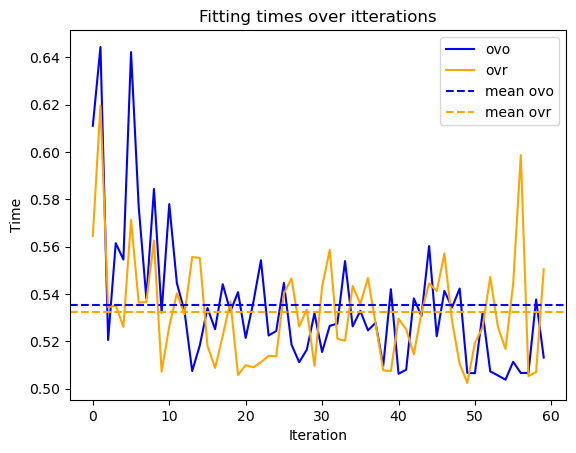

In [73]:
def ovo_ovr(df, params):
    # train test split
    X_train, X_test, y_train, y_test = tt_split(df)

    # standart scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    shapes = ['ovo', 'ovr']
    fit_time = [[],[]]
    pred_time = [[],[]]
    for i_sh, shape in enumerate(shapes):
        for i in range(60):
            # Create a SVC model
            svc = SVC(**params, decision_function_shape=shape)
            a = time()
            svc.fit(X_train, y_train)
            b = time()
            y_pred = svc.predict(X_test)
            c = time()
            b_acc = balanced_accuracy_score(y_test, y_pred)
            fit_time[i_sh].append(b-a)
            pred_time[i_sh].append(c-b)   
        print(f'The balanced accuracy of the SVC model with decision function shape {shape} is {b_acc}')    
    fig, ax = plt.subplots()
    ax.plot(fit_time[0], label='ovo', color = 'blue')
    ax.plot(fit_time[1], label='ovr', color = 'orange')
    ax.set_title('Fitting times over itterations')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Time')
        # draw horizontal line for mean value
    plt.axhline(np.mean(fit_time[0]), color='blue', linestyle='--', label='mean ovo')
    plt.axhline(np.mean(fit_time[1]), color='orange', linestyle='--', label='mean ovr')
    ax.legend()
    plt.show()

params = {'C': 100, 'gamma': 0.01, 'class_weight':'balanced'}
ovo_ovr(df, params)

**Grid for 'decision_function_shape':**
- It can be seen that the accuracy does not change at all depending on whether we use the 'ovo' or 'ovr' technique. The 'ovr' strategie seems to be a little faster. This is why we will use the 'ovr' as the decision function shape.
    - 'decision_function_shape': ['ovr']

The parameter coef0 depends is different for different kernels and degrees of the . To get an idea about the magnitude of an appropriate value for this paramater we will use a polynomial kernel with degree 3 using optimized parameters from the step before assuming that the deviation of the previously investigated parameters is not too big with different coef0.

In [74]:
def scorer(y_true, y_pred):
    b_acc = balanced_accuracy_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return b_acc, acc, f1


def find_good_params(df=None, opt_par=[], opt_par_name= None, random_state=42, x_label='x_label', y_label='Balanced Accuracy', params = {}):
     # Train-test split
    X_train, X_test, y_train, y_test = tt_split(df, random_state=random_state)

    # Standard scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    train_bal_acc = []
    test_bal_acc = []
    for i_opt, par in enumerate(opt_par):
        params[opt_par_name] = par
        model.set_params(**params)
        # Train the model
        model.fit(X_train, y_train)
        # Evaluate on test data
        y_pred_test = model.predict(X_test)
        b_acc_test, acc_test, f1_test = scorer(y_test, y_pred_test)
        test_bal_acc.append(b_acc_test)

        # Evaluate on train data
        y_pred_train = model.predict(X_train)
        b_acc_train, acc_train, f1_train = scorer(y_train, y_pred_train)
        train_bal_acc.append(b_acc_train)

    opt_par_array = np.array(opt_par)  # Convert opt_par to array

    # Create the plot with labels for both lines
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=opt_par_array, y=train_bal_acc, mode='lines', name='Train Balanced Accuracy'))
    fig.add_trace(go.Scatter(x=opt_par_array, y=test_bal_acc, mode='lines', name='Test Balanced Accuracy'))

    fig.update_layout(title='Balanced Accuracy for different ' + x_label + ' values',
                      xaxis_title=x_label,
                      yaxis_title=y_label)

    fig.show()


In [75]:
params = {'C': 100, 'gamma': 0.01, 'kernel': 'poly', 'degree': 3, 'class_weight':'balanced'}
coef0 = np.linspace(0, 4, 25)
find_good_params(df = df, opt_par = coef0, opt_par_name='coef0', x_label='coef0',  params=params) 

**Grid for coef0:**
- The default value of gamma is set to 0. But values unequal to 0 gain better balanced accuracys. Too high coef0 reduce the test accuracy and the train accuracy rises. High coef0 lead to overfitting. I will use 3 values around the peak at 0.5 for the gridsearch.
    - coef0: [0.4, 0.6, 0.8] around the maximum.
    
I again kept the range of the values broad, resulting from the before mentioned reasons.

Now we will investigate the tol parameter. This parameter controlls the variance for the stopping criteria. A low 'tol' parameter leads to more iterations of the algorithm, whereas higher 'tol' values lead toless iterations but running the risk of not reaching the full potential of classfier. I will investigate now the impact of this parameter on the accuracy result:

In [76]:
params = {'C': 100, 'gamma': 0.01, 'kernel': 'poly', 'degree': 3, 'class_weight':'balanced', 'coef0': 0.5}
tol = np.linspace(0.0001, 1, 20)
find_good_params(df = df, opt_par = tol, opt_par_name='tol', x_label='tol',  params=params, random_state=42)

**Grid for tol:**
- When performing the prediction with different random seeds for the train test split, it results in strongly fluctuating curves. No clear peak is visible. Change the random state in the previous code. This is why I will keep the default value of this parameter and will not optimize this value, since it does not seem to have a significant impact.

    - 'tol' : 0.001 = default

Find an apprpriate range for the degree of the polynomial kernel:

In [77]:
# we will use the best parameters from the previous steps
params = {'C': 100, 'gamma': 0.01, 'coef0': 0.5, 'kernel':'poly', 'class_weight':'balanced'}
degree = range(1, 10)
find_good_params(df = df, opt_par = degree, opt_par_name='degree', x_label='degree',  params=params)

**Grid for 'degree':**
- The train and test accuracy is forming a plateau from degree 2 till degree to approx. 5. Higher degrees lead to overfitting, since the hyperplanes become very complex in the lower dimensions.
    - 'degree': [1,2,3,4,5]

**Grid for 'kernel':**
- We will not investigate the 5 kernels more, we will use the in the lecture discussed kernels:
    - 'degree': [1,2,3,4,5]

Now we have an idea for how to choose the range of the hyperparameters. But the grid is due to computational effiency quite coarse and will most likely not lead to the optimal accuracys. For choosing the best algorithm later we need to assume that the grid was choosen good enough in order to yield the truely better algorithm.


#### Nested Cross Validation
We found the following values for a grid:

| Hyperparameter | Values                    |
|----------------|---------------------------|
| C              | [1, 10, 100]              |
| gamma          | [0.001, 0.01, 0.1]         |
| coef0          | [0.4, 0.6, 0.8]            |
| degree         | [1, 2, 3, 4, 5]            |
| svc__kernel    | ['poly', 'rbf']           |

Note: A polynomial kernel with degree 1 is a linear kernel.

**Setup of Nested Cross Validation:**
| Setting                         | Value |
|---------------------------------|-------|
| Outer cross validations         | 10    |
| Inner cross validations         | 10    |
| Repeat nested cross validation  | 2     |
| Gridsearch on same outer split  | No    |

In [78]:
def nested_cross_validator(model_pipe = None, outer_cv = 3, inner_cv = 3, param_grid = {},estimator = None, x = None, y = None, n_repeats = 1, ev_scores = []) -> list:
    """
    Perform nested cross validation to find the best model.
    Also encoding of encoding and scaling can be treated as hyperparameters.
    """
    # import gridsearch and repeated stratified k fold
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import make_scorer
    from tqdm import tqdm

    # create the outer loop
    bal_accuracys_train = []
    accuracys_train = []
    f1_scores_train = []
    bal_accuracys_test = []
    accuracys_test = []
    f1_scores_test = []
    outer_loop = RepeatedStratifiedKFold(n_splits=outer_cv, n_repeats=n_repeats, random_state = 1)

    for train_ix, test_ix in tqdm(outer_loop.split(x, y), total=outer_cv*n_repeats, desc='Progress'):
        # now gridsearch
        grid_search = GridSearchCV(estimator=model_pipe, param_grid=param_grid, n_jobs= 4, cv=inner_cv, scoring=make_scorer(estimator), verbose=1)
        # fit grid search
        search = grid_search.fit(x[train_ix], y[train_ix])
        # get the best model
        best_model = search.best_estimator_
        # predict the best model
        yhat = best_model.predict(x[test_ix])
        # evaluate the model
        b_acc_test, acc_test, f1_test = scorer(y[test_ix], yhat)
        # append the results
        bal_accuracys_test.append(b_acc_test); accuracys_test.append(acc_test); f1_scores_test.append(f1_test)
        # store the result
        yhat = best_model.predict(x[train_ix])
        b_acc_train, acc_train, f1_train = scorer(y[train_ix], yhat)
        # append the results
        bal_accuracys_train.append(b_acc_train); accuracys_train.append(acc_train); f1_scores_train.append(f1_train)
        # evaluate the model
        
    # store the results
    # add the results to the dataframe, using concatentation
    mean_fit_time = np.mean(search.cv_results_['mean_fit_time'])
    mean_score_time = np.mean(search.cv_results_['mean_score_time'])

    df_results.loc[len(df_results)] = ['SVM_n_cv', np.mean(bal_accuracys_test), np.std(bal_accuracys_test), np.mean(accuracys_test), np.std(accuracys_test),
                                   np.mean(f1_scores_test), np.std(f1_scores_test), np.mean(bal_accuracys_train), np.std(bal_accuracys_train), np.mean(accuracys_train), np.std(accuracys_train),
                                   np.mean(f1_scores_train), np.std(f1_scores_train), mean_fit_time, mean_score_time]
    # save results
    save_results(df_results)

def scorer(y_true, y_pred):
    b_acc = balanced_accuracy_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return b_acc, acc, f1

def save_results(results):
    results.to_csv(f'results/results_svm.csv', index=False)


In [79]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced', decision_function_shape='ovr'))
])

param_grid = {
    'svc__gamma':[0.001, 0.01, 0.1],
    'svc__C': [1, 10, 100],
    'svc__coef0': [0.4,0.6,0.8],
    'svc__kernel': ['poly', 'rbf'],
    'svc__degree': [1, 2, 3, 4, 5],
}

outer_cv = 10
inner_cv = 10
n_repeats = 2

X = df.drop(columns='Class').values
y = df['Class'].values

'''Uncoment to run the nested cross validation'''
# nested_cross_validator(model_pipe = svm_pipe, outer_cv = outer_cv, inner_cv = inner_cv, param_grid = param_grid, estimator = balanced_accuracy_score, x = X, y = y, n_repeats = n_repeats)

# read in the results
results = pd.read_csv('results/results_svm.csv')
display(results)

Model  Mean Balanced Accuracy Test  Std Balanced Accuracy Test  \
0  SVM_GridSearchCV                     0.934958                    0.007651   

   Mean Accuracy Test  Std Accuracy Test  Mean F1 Score Test  \
0            0.921204           0.008305            0.921456   

   Std F1 Score Test  Mean Balanced Accuracy Train  \
0           0.008247                      0.936352   

   Std Balanced Accuracy Train  Mean Accuracy Train  Std Accuracy Train  \
0                      0.00152             0.922701            0.002029   

   Mean F1 Score Train  Std F1 Score Train  Fit Time  Prediction Time  
0             0.922957            0.001991  1.057793          0.19926

To perform this nested cross validation took 7 hours on my machine.
### AdaBoost
The AdaBoost classifier is a meta estimator that begins by fitting a classifier on the original dataset and the fits copies of the classifier on the dataset again. AdaBoost introduces weights to each estimator and in case of incorrectly classified instances changes their weight. The weightd of the wrong classified instances is changed.
#### Choosing a Reasonable Hyperparameter Grid

- **n_estimator:** Number of estimators used by the AdaBoostClassifier

- **max_depth:** The maximum depth of each decision tree.

- **ccp_alpha:** This parameter controlls the amount of prunning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.


In [81]:
# Ausing algorithm = 'SAMME' because it is deprecated
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), algorithm='SAMME')

   # Create a dictionary with the hyperparameters
param_grid = {
        'n_estimators': np.linspace(1, 100, 10, dtype=int),
        'estimator__ccp_alpha': np.arange(0,.002, 0.0002),
    }
'''Uncoment to run the 2d optimization'''

scores_test, scores_train = opt_2d(df, param_grid, model)
two_d_hist(param_grid, scores_train, scores_test, type_scale='linear')

**Grid for 'n_estimators' and 'ccp_alpha':**
- It seems that AdaBoost tends to overfit on this dataset easily. The AdaBoost model is maybe to complex for the dataset. The prunning is also computational expensive. Higher alphas lead to less overfitting but also reducing the test balanced accuracy. Higher number of estimators also lead to a better test accuracy and train accuracy. But also the overfitting increases. I will use 3 fitting parameters each in order to keep the computation time for my machine below many hours.
    - 'n_estimators': [80, 90, 100]
    - 'ccp_alpha': [0.0008, 0.001, 0.0012]
    
- also higher ccp_alpha vales could have been chosen. But the test accuracy keeps on reducing for higher ccp_alpha values.

We have found a good range for the number of estimators and the prunning parameter ccp_alpha. Now we will in investigate whether the max depth parameter improves the balanced accuracy even more and reduces the train accuracy:

In [82]:
#   ada = AdaBoostClassifier(n_estimators= 90, estimator=DecisionTreeClassifier(max_depth=depth, ccp_alpha=0.001, class_weight='balanced'))

max_depth = range(1, 30, 3)
opt_par_name = 'estimator__max_depth'
params = {'n_estimators': 90, 'estimator__ccp_alpha': 0.001, 'estimator__class_weight':'balanced'}

find_good_params(df = df, opt_par = max_depth, opt_par_name=opt_par_name, x_label='max_depth',  params=params)

**Grid for the max_depth:**
- A higher max depth of a decision tree results into a fast increase in accuracy but converges quickly. So it seems like optimizing the max_depth does not change the accuracy and does not reduce overfitting. Rsponsible for this is probably the prunning parameter ccp_alpha.
    - 'max_depth': None

#### Nested Cross Validation
Now we found an appropriate grid for the AdaBoostClassifier:

| Hyperparameter               | Values                |
|------------------------------|-----------------------|
| ada__estimator__ccp_alpha    | [0.0004, 0.0006, 0.0008] |
| ada__n_estimators            | [80, 90, 100]         |


The prunning in the Adaboost classifier is computionaly expensive. This is why it is not possible for me to use a bigger grid. The model can be probably tweeked more. I will run the nested cross validation with following parameters:
| Setting                         | Value |
|---------------------------------|-------|
| Outer cross validations         | 8     |
| Inner cross validations         | 8     |
| Gridsearch                      | 1     |
|  Gridsearch on same outer split | No    |

In [83]:
def nested_cross_validator(model_pipe = None, outer_cv = 3, inner_cv = 3, param_grid = {},estimator = None, x = None, y = None, n_repeats = 1, ev_scores = []) -> list:
    """
    Perform nested cross validation to find the best model.
    Also encoding of encoding and scaling can be treated as hyperparameters.
    """
    # import gridsearch and repeated stratified k fold
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import make_scorer
    from tqdm import tqdm

    # create the outer loop
    bal_accuracys_train = []
    accuracys_train = []
    f1_scores_train = []
    bal_accuracys_test = []
    accuracys_test = []
    f1_scores_test = []
    outer_loop = RepeatedStratifiedKFold(n_splits=outer_cv, n_repeats=n_repeats, random_state = 1)

    for train_ix, test_ix in tqdm(outer_loop.split(x, y), total=outer_cv*n_repeats, desc='Progress'):
        # now gridsearch
        grid_search = GridSearchCV(estimator=model_pipe, param_grid=param_grid, n_jobs= 4, cv=inner_cv, scoring=make_scorer(estimator), verbose=1)
        # fit grid search
        search = grid_search.fit(x[train_ix], y[train_ix])
        # get the best model
        best_model = search.best_estimator_
        # predict the best model
        yhat = best_model.predict(x[test_ix])
        # evaluate the model
        b_acc_test, acc_test, f1_test = scorer(y[test_ix], yhat)
        # append the results
        bal_accuracys_test.append(b_acc_test); accuracys_test.append(acc_test); f1_scores_test.append(f1_test)
        # store the result
        yhat = best_model.predict(x[train_ix])
        b_acc_train, acc_train, f1_train = scorer(y[train_ix], yhat)
        # append the results
        bal_accuracys_train.append(b_acc_train); accuracys_train.append(acc_train); f1_scores_train.append(f1_train)
        # evaluate the model
    # store the results
    # add the results to the dataframe, using concatentation
    mean_fit_time = np.mean(search.cv_results_['mean_fit_time'])
    mean_score_time = np.mean(search.cv_results_['mean_score_time'])

    df_results.loc[len(df_results)] = ['AdaBoost_Tree_Nest', np.mean(bal_accuracys_test), np.std(bal_accuracys_test), np.mean(accuracys_test), np.std(accuracys_test),
                                   np.mean(f1_scores_test), np.std(f1_scores_test), np.mean(bal_accuracys_train), np.std(bal_accuracys_train), np.mean(accuracys_train), np.std(accuracys_train),
                                   np.mean(f1_scores_train), np.std(f1_scores_train), mean_fit_time, mean_score_time]
    # model name
    save_results(df_results)


def scorer(y_true, y_pred):
    b_acc = balanced_accuracy_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return b_acc, acc, f1

def save_results(results):
    results.to_csv('results/results_adab_tree.csv', index=False)

# make the pipeline with AdaBoost using DecisionTreeClassifier, SAMME.R algorithm will be romoved in future versions, so we will use SAMME
ada_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), algorithm='SAMME'))
])

# this will give a good result for the SVM
X = df.drop(columns='Class').values
y = df['Class'].values

param_grid = {
    'ada__estimator__ccp_alpha': [0.0004, 0.0006, 0.0008],
    'ada__n_estimators': [80,90,100],
}
'''Uncoment to run the nested cross validation'''
#result = nested_cross_validator(model_pipe = ada_pipe, outer_cv = 8, inner_cv = 8, param_grid = param_grid, estimator = balanced_accuracy_score, x = X, y = y, n_repeats = 2)

df_results = pd.read_csv('results/results_adab_tree.csv')
display(df_results)

Model  Mean Balanced Accuracy Test  \
0    SVM_GridSearchCV                     0.934958   
1  AdaBoost_Tree_Nest                     0.935744   

   Std Balanced Accuracy Test  Mean Accuracy Test  Std Accuracy Test  \
0                    0.007651            0.921204           0.008305   
1                    0.008180            0.925024           0.007641   

   Mean F1 Score Test  Std F1 Score Test  Mean Balanced Accuracy Train  \
0            0.921456           0.008247                      0.936352   
1            0.925020           0.007615                      1.000000   

   Std Balanced Accuracy Train  Mean Accuracy Train  Std Accuracy Train  \
0                      0.00152             0.922701            0.002029   
1                      0.00000             1.000000            0.000000   

   Mean F1 Score Train  Std F1 Score Train   Fit Time  Prediction Time  
0             0.922957            0.001991   1.057793         0.199260  
1             1.000000            0.000000  37.880772         0.061533

The nested cross validation took 4 hours on my machine.
## Analysis of the Final Model - Task 7
### Summary of Results

| Metric                        | SVM_GridSearchCV           | AdaBoost_Tree_Nest       |
|-------------------------------|----------------------------|--------------------------|
| **Test Performance**          |                            |                          |
| Mean Balanced Accuracy        | 0.9350                     | 0.9357                   |
| Std Balanced Accuracy         | 0.0077                     | 0.0082                   |
| Mean Accuracy                 | 0.9212                     | 0.9250                   |
| Std Accuracy                  | 0.0083                     | 0.0076                   |
| Mean F1 Score                 | 0.9215                     | 0.9250                   |
| Std F1 Score                  | 0.0082                     | 0.0076                   |
| **Train Performance**         |                            |                          |
| Mean Balanced Accuracy        | 0.9364                     | 1.0000                   |
| Std Balanced Accuracy         | 0.0015                     | 0.0000                   |
| Mean Accuracy                 | 0.9227                     | 1.0000                   |
| Std Accuracy                  | 0.0020                     | 0.0000                   |
| Mean F1 Score                 | 0.9230                     | 1.0000                   |
| Std F1 Score                  | 0.0020                     | 0.0000                   |
| **Timing**                    |                            |                          |
| Mean Fit Time (seconds)            | 1.0578                     | 37.8808                  |
| Mean Prediction Time (seconds)     | 0.1993                     | 0.0615                   |
### Performance
- Both models have similar test performance in terms of Balanced Accuracy, Accuracy, and F1 Score, with AdaBoost slightly outperforming SVM in test metrics.
- AdaBoost shows perfect train metrics (mean values of 1.0 and standard deviations of 0), which might indicate overfitting, especially since the test performance is similar to that of the SVM.

### Overfitting Risk
- The perfect train performance for AdaBoost suggests that it might be overfitting the training data, as it performs perfectly on training data but similarly to SVM on test data.

### Training and Prediction Time
- The SVM model trains much faster (1.0578 seconds) compared to AdaBoost (37.8808 seconds).
- The prediction time for SVM is longer (0.1993 seconds) compared to AdaBoost (0.0615 seconds).

Given these considerations, the SVM model with GridSearchCV seems to be a more balanced choice:
- It has similar test performance metrics to AdaBoost without signs of overfitting.
- It has a much faster training time, which can be beneficial if you need to frequently retrain the model.

Therefore, I recommend choosing the SVM model with GridSearchCV based on the balance of performance and practical considerations like training time. But in terms of prediction times the SVM might be too slow for identifying the beans. Since the time requirements are not known, I will choose the SVM model for further analysis.

### Analysis of the Individual Classifications
In the next step we will perform a gridsearch on the dataset one last train test split and will evaluate the predictions.


In [85]:
import joblib

def final_model(df, params, opt_par):
    # Train-test split
    X_train, X_test, y_train, y_test = tt_split(df, random_state=42)

    # Standard scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # make dataframes
    X_train = pd.DataFrame(X_train, columns=df.drop(columns='Class').columns)
    X_test = pd.DataFrame(X_test, columns=df.drop(columns='Class').columns)


    # Create a Support Vector Machine model
    svc = SVC(**params)
    
    # GridSearchCV
    grid_search = GridSearchCV(estimator=svc, param_grid=opt_par, n_jobs=-1, cv=6, scoring=make_scorer(balanced_accuracy_score), verbose=0)
    search = grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = search.best_estimator_
    
    # save the model
    joblib.dump(best_model, 'results/best_model.pkl')

def load_evaluate_model(df):
    model = joblib.load('results/best_model.pkl')
    # split with same random state
    X_train, X_test, y_train, y_test = tt_split(df, random_state=42)
    # Standard scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # make
    X_train = pd.DataFrame(X_train, columns=df.drop(columns='Class').columns)
    X_test = pd.DataFrame(X_test, columns=df.drop(columns='Class').columns)

    # Predict using the best model
    yhat_test = model.predict(X_test)
    yhat_train = model.predict(X_train)

    return model, yhat_test, y_test, yhat_train, y_train


params = {'class_weight': 'balanced'}

param_grid = {
    'gamma': [0.001, 0.01, 0.1],
    'C': [1, 10, 100],
    'coef0': [0, 0.1,0.2, 0.3],
    'kernel': ['poly', 'rbf'],
    'degree': [1, 2, 3],
}


final_model(df, params, param_grid)
best_model, predictions, y_test, predictions_train, y_train = load_evaluate_model(df)
best_model



SVC(C=10, class_weight='balanced', coef0=0, degree=1, gamma=0.1)

The following good parameters were found for the SVM:

| Parameter     | Value        |
|---------------|--------------|
| C             | 10           |
| class_weight  | balanced     |
| coef0         | 0       |
| degree        | 1            |
| gamma         | 0.1          |

Interestingly, a linear kernel leads to the best results compared to higher degree polynomials. Also the best balanced accuracy was reached for coef0 = 0. I run the evaluation for the final model multiple times and changed the grid to find better fitting values for the SVM. That also means that the grid was not set up in a good way and better balanced accuracys could have been archieved in the nested cross validation. In this case is does not make a difference, since the SVM lead to a better result compared to the AdaBoost algorithm.

In [86]:
def plot_bal_acc_class_plotly(y_true, y_pred, classes):
    """
    Plot the balanced accuracy for each class using Plotly.
    """
    # Calculate the balanced accuracy for each class
    class_accuracies = []
    for cls in classes:
        # Binary classification for the current class
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)
        # Calculate balanced accuracy
        b_acc = balanced_accuracy_score(y_true_bin, y_pred_bin)
        class_accuracies.append(b_acc)
    
    # Create a DataFrame
    b_acc_df = pd.DataFrame(class_accuracies, index=classes, columns=['Balanced Accuracy'])
    b_acc_df.reset_index(inplace=True)
    b_acc_df.rename(columns={'index': 'Class'}, inplace=True)
    
    # Create the plot
    fig = px.bar(
        b_acc_df, 
        x='Balanced Accuracy', 
        y='Class', 
        title='Balanced Accuracy for Each Class',
        labels={'Balanced Accuracy': 'Balanced Accuracy', 'Class': 'Class'},
        color='Balanced Accuracy',
        color_continuous_scale='viridis',
        orientation='h',
        range_x=[0, 1]  # Balanced accuracy ranges from 0 to 1
    )
    
    # Add the accuracy values inside the bars
    fig.update_traces(text=b_acc_df['Balanced Accuracy'].round(4), textposition='inside')

    fig.update_layout(height=600)
    
    fig.show()

# Assuming y_test and predictions are defined, and df is your DataFrame
plot_bal_acc_class_plotly(y_test, predictions, df['Class'].unique())


It was already known from the data analysis that the species 'Bombay' was the most separable. This is also evident as the balanced accuracy here is '1'. The worst balanced accuracy was found for the variety 'Sira'. The balanced accuracy shown here is not representative, as it was only carried out on one train test split. 


## Feature Importance - Task 8
### Basic Idea
The permutation feature imprtance is a model inspection technqiue in order to find out how important a specific attribute for a classifier is. This technique shuffles the values of a column and measures how much the accuracy decreases. The more the accuracy decreases of a specific feature when shuffling the more important is the feature.

In [87]:
import joblib
from sklearn.inspection import permutation_importance

def feature_importance(model, X, y):
    """
    Plot the feature importance using feature permutation with Plotly.
    """
    # Create the permutation importance object
    result = permutation_importance(model, X, y, n_repeats=20, random_state=42, n_jobs=-1, scoring='balanced_accuracy')
    
    # Extract importances and feature names
    importances = result['importances']
    feature_names = X.columns
    
    # Create a DataFrame for the importances
    importance_df = pd.DataFrame(importances.T, columns=feature_names)

    # rearange column with descendig mean order
    importance_df = importance_df[importance_df.mean().sort_values(ascending=True).index]

    
    fig = px.box(importance_df ,title='Permutation Feature Importance', 
           labels={'value': 'Decrease in balanced accuracy', 'variable': 'Feature'}, orientation='h', height=700)

    fig.show()

# Load the model
model = joblib.load('results/best_model.pkl')

# Split the data
X_train, X_test, y_train, y_test = tt_split(df)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to DataFrames
X_train = pd.DataFrame(X_train, columns=df.drop(columns='Class').columns)
X_test = pd.DataFrame(X_test, columns=df.drop(columns='Class').columns)

# Calculate and plot feature importance
feature_importance(model, X_test, y_test)


### Analysis of Permutation Feature Importance Plot

The plot titled "Permutation Feature Importance" provides a visual representation of the importance of various features in determining the accuracy of a model. The horizontal boxplots show the distribution of the decrease in balanced accuracy for each feature when its values are permuted. Here's a detailed analysis of the plot:

#### Key Observations:

1. **Feature Importance Ranking**:
   - The features are sorted in descending order of their median importance, which is reflected by their position from top to bottom.
   - **ShapeFactor4** is the most important feature, showing the highest median decrease in balanced accuracy when permuted.
   - **Extent** is the least important feature, showing the smallest median decrease in balanced accuracy.


2. **Interpretation of Importance**:
   - The x-axis represents the decrease in balanced accuracy, a measure of the model's performance. A higher decrease indicates a more important feature, as the model relies heavily on this feature for accurate predictions.
   - The width of the box (IQR) shows the variability in the feature's importance. Narrower boxes imply more consistent importance, while wider boxes indicate more variability.

#### Implications for Model Improvement:

- **Focus on Top Features**: The top features like **ShapeFactor4**, **roundness**, and **ShapeFactor1** should be the focus for improving model performance, as they have the highest impact.
- **Examine Variable Features**: Features with high variability in importance (large IQR) may require further investigation to understand why their impact fluctuates. This could involve checking for interactions with other features or reconsidering their measurement methods.
- **Consider Feature Engineering**: For features with lower importance, like **Extent**, consider whether feature engineering or transformation could increase their relevance, or if they could be excluded to simplify the model.

#### Conclusion:

This permutation feature importance plot effectively highlights which features are most critical for the model’s accuracy and provides insights into their variability. By focusing on the most important features and investigating those with high variability, we can refine the model to achieve better performance and stability.

**Note:** The calculated feature importance is not the generall feature importance. It does not reflect the intrinsic predictive power of a feature by itself but how important a feature for a particular model is.

## Conclusion and Future Work
### Summary
In this jupyter notebook I developed a classifier in order to segmant different types of beans enabling our company to fullfill the requeirements for the ingredients of the smoothies. At first I investigated the data using IDA and EDA and could make sure that the data does not contain outliers, no missing values and has as sufficient quality for the classifiers. I used a dummy classifier and ran the a SVM and AdaBoost modell with decision trees in default and could create a already good baseline model reaching balanced accuracys more the 92%. The models were just trained on a single train test split and the balanced accuracys therefore have only a limited informative value. In the next step I investigated the hyperparameters in order to find a good hyperparameter grid for the following nested cross validation. Since the dataset is large running the nested cross validation took a long time. The AdaBoost model in particular took a very long time to calculate due to the prunning and therefore only a small hyper parameter grid could be used. The SVM, on the other hand, allowed a much larger hyperparameter grid. It turned out that the scores of the two classifiers are similar but the AdaBoost model start overfitted. I therefore decided in favor of the SVM. I then ran the SVM model on a train test split with a Grisearch for hyperparameter optimization and then examined the individual predictions of the classes with the test data set. The hyperparameter optimization showed that a linear kernel leads to the best scores, which was unexpected. When examining the classes of the predictions, it was found that all classes had similarly good scores. The highest balanced accuracy was 1 (Bombay) and the worst a few percentage points below. In the last step, I analyzed the importance of features using the permutation method. I realized that the ShapeFactor4 with the roundness seems to be the most important one and stands out significantly from the other fetures. A balanced accuracy of approx. 93.5% was reached with the SVM.
### Usabilty of Applied Methodology
Finding good values for the gridsearch is hard to do. In case of the SVM the methodolgy of investigating the hyperparameters independet of each other did not lead to a trustfull result for the grid. A maybe better approach would be to start with a very coarse and wide grid and then reduce the grid and make it more detailed to 'converge' to a minimum. Large datasets lead to long computations and maybe a different approach to find a good set of hyperparameters should be taken i this case.

### Usability for the Company
A balanced accruacy with the SVM of 93.5% was reached, but it is not known what scores need to be reached to fullfill the standarts. The mean prediction time of the SVM's nested cross validation was around 0.2s which could be too low. The AdaBoost on the otherside was way faster with a mean prediction time in the nested cross validation of around 0.06s. More information is needed to draw conclusions about the usability. The AdaBoost modell was

### Limitations and Pitfalls
I should not have chosen the AdaBoost model as the second classifier, as it is complex and could not be analyzed well with the size of the data set and the computing power available. The model also seems to be too complex for the data set, as the train scores are extremely high. Significantly higher than the test accuracy. When I trained the final model, I realized that the hyperparameter grid was not well chosen and better results could be achieved for coef=0. In this case, it doesn't make a difference in terms of model choise because I decided to use the SVM anyway. But as soon as I train new models, the comparison is not optimal, as a better result could probably have been achieved with the SV. With large data sets, it only makes sense in my opinion to perform a gridsearch if you have sufficient computing power or time. Otherwise, other methods for optimizing the hyperparameters are probably more appropriate. However, the nested cross validation has delivered a promising and credible result and one can expect that similar results will be achieved in the application. But only if the application leads to the same measurement results and the model can be trained with them.

### Ideas and Future Work
0. Gather the necessary requirements for the application!

1. Run the support vector machine with a more detailed gridsearch on a machine with more computational power in order to imprve the model further.

2. Using [Optuna](https://optuna.org/) to find faster good parameters and compare them to the gridsearch.

3. Distance based models seem to work well on that dataset. The KNN classifier could be investigated.